# COVID-19 In Minnesota

The summer of 2020 looked pretty good Minnesota as most of the rest of the US suffered outbreaks from the ongoing COVID-19 pandemic.  After a terrible spring (but not as terrible as New York!) the rate of new cases seemed to settle down to a stubborn flow:  bad, but not cause for panic.  We had avoided an exponential explosion of cases.

But no.  Looking at the steep rise launched in September and still going strong in mid-November, it's worth asking:  was COVID-19 growing exponentially in Minnesota all along?

The question is prompted in part by a recurring observation from `@CherylRofer` on Twitter: *This is what exponential growth looks like.*

The [Minnesota Department of Health](https://www.health.state.mn.us/diseases/coronavirus/index.html) provides daily summaries, weekly detailed reports, and frequent data dumps on COVID-19.  Here's a quick analysis of one slice of the data.

## Fetching and cleaning the data

Start with the Minnesota CSV file dump of COVID-19 cases, indexed by age group and date of sample collection.  For now we can ignore the age group and accumulate all cases for each week across all age groups.

The Minnesota report codes dates as [MMWR](https://en.wikipedia.org/wiki/Morbidity_and_Mortality_Weekly_Report) weeks.  So, for example, the data starts on week 10, which ran from March 1--7.

In [6]:
from urllib.request import urlopen
from csv import reader
import collections as coll

MN_CSV_URL = 'https://www.health.state.mn.us/diseases/coronavirus/stats/wagscd.csv'

with urlopen(MN_CSV_URL) as cf:
    weekly_csv = [r for r in reader(cl.decode('utf-8') 
                                    for cl in cf)]

# Digest raw CSV data:
# 1.  Convert verbose week labels to integers;
# 2.  Accumulate case counts by week over all age groups.
weeks = coll.Counter()
for w in weekly_csv[1:]:
    week = int(w[1].split()[1].split(':')[0])
    weeks[week] += int(w[2])

# Indices of weeks with valid data.
# Exclude most recent week, with incomplete data.
mmwr = sorted(weeks.keys())[:-1]

## False sense of security

During the summer---say, weeks 22--37 (5/24 through 9/12), the published plots of new cases looked more or less linear.  Here's an approximation (the originals are on the MN Health Department website linked above), followed by a plot of the cumulative case count.

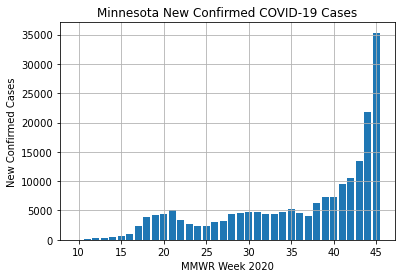

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(mmwr, [weeks[w] for w in mmwr])
plt.title('Minnesota New Confirmed COVID-19 Cases')
plt.xlabel('MMWR Week 2020')
plt.ylabel('New Confirmed Cases')
plt.grid();

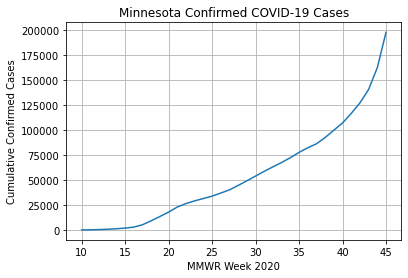

In [4]:
toll = np.cumsum([weeks[w] for w in mmwr])

plt.plot(mmwr, toll)
plt.title('Minnesota Confirmed COVID-19 Cases')
plt.xlabel('MMWR Week 2020')
plt.ylabel('Cumulative Confirmed Cases')
plt.grid();

So yes, those both look linear until they explode around 9/13 (week 38).

## Was it exponential all along?

Maybe!  Here's a logarithmic plot of cumulative cases showing that apparently linear interval during the summer looks surprisingly linear (and therefore exponential) too.

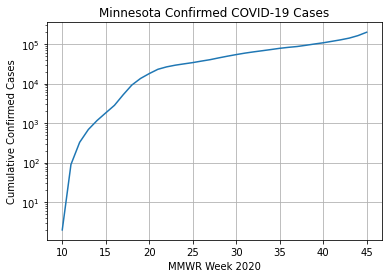

In [5]:
plt.semilogy(mmwr, toll)
plt.title('Minnesota Confirmed COVID-19 Cases')
plt.xlabel('MMWR Week 2020')
plt.ylabel('Cumulative Confirmed Cases')
plt.grid();

## Improving on the eyeball

If the underlying process is exponential, we'd expect the count each week to be a multiple of the preceding week.  That holds through the summer (allowing for noise), with about 7.5% increase week to week.

This plot prunes out the first eleven weeks, which are a mess with huge percentage increases, so we'll consider those separately later.  And there's an explosion starting in week 44, which is even scarier.

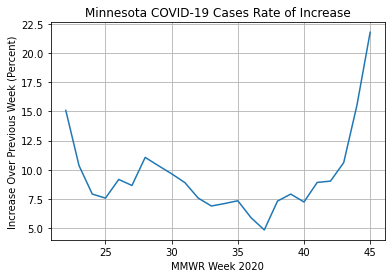

In [14]:
PRUNE = 11
plt.plot(mmwr[(PRUNE+1):], ((toll[(PRUNE+1):] / toll[PRUNE:-1]) - 1) * 100.0)
plt.title('Minnesota COVID-19 Cases Rate of Increase')
plt.xlabel('MMWR Week 2020')
plt.ylabel('Increase Over Previous Week (Percent)')
plt.grid();

## TBD

 - Analyze first ten weeks
 - Analyze week-44 explosion
 - Linear regression on summer, both linear and logarithmic